In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import torch

-185.86982304957837 9.329536882514507


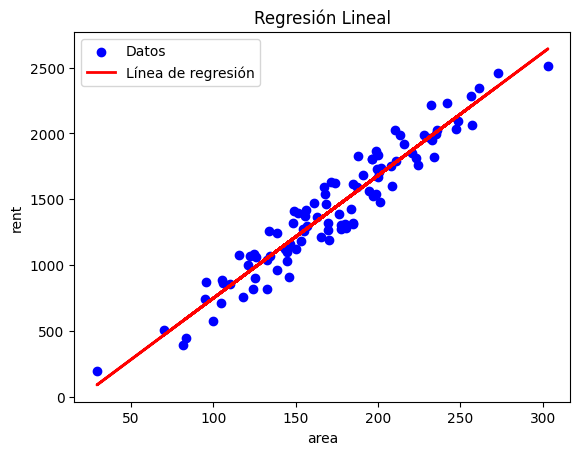

In [67]:
df = pd.read_csv('houses.csv')

xs = np.array(df['area'])
ys = np.array(df['rent'])

modelo_rl = LinearRegression()

modelo_rl.fit(xs.reshape(-1, 1), ys)
print(modelo_rl.intercept_, modelo_rl.coef_[0])
predicciones = modelo_rl.predict(xs.reshape(-1, 1))

plt.scatter(xs, ys, color='blue', label='Datos')

# Realiza el plot de la línea de regresión
plt.plot(xs, predicciones, color='red', linewidth=2, label='Línea de regresión')

# Configura el gráfico
plt.xlabel('area')
plt.ylabel('rent')
plt.title('Regresión Lineal')
plt.legend()

plt.show()

In [68]:
np.random.seed(2476)
a = np.random.randn(1)
b = np.random.randn(1)

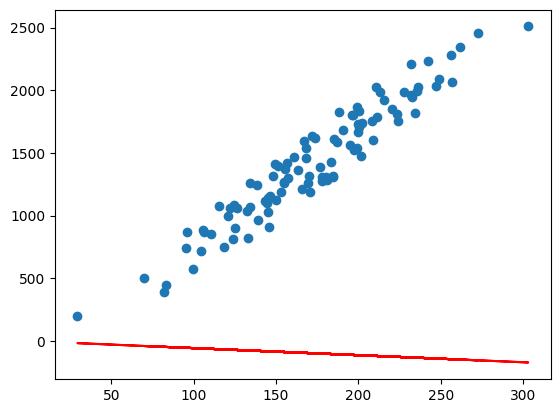

In [69]:
plt.scatter(xs, ys)
plt.plot(xs, xs *a + b, 'r-')

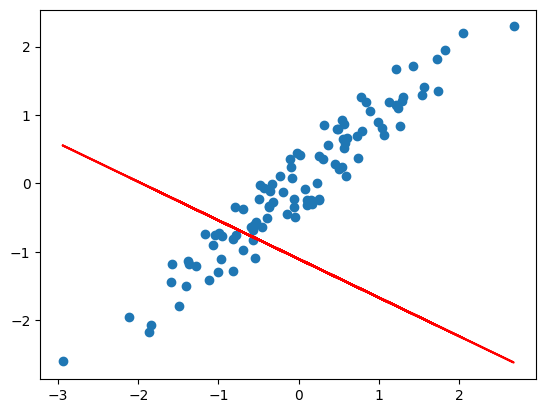

In [70]:
xs_n = (xs-xs.mean())/xs.std()
ys_n = (ys-ys.mean())/ys.std()
plt.scatter(xs_n, ys_n)
plt.plot(xs_n, xs_n *a + b, 'r-')
plt.show()

[0.95903898] [-1.85917225e-09]


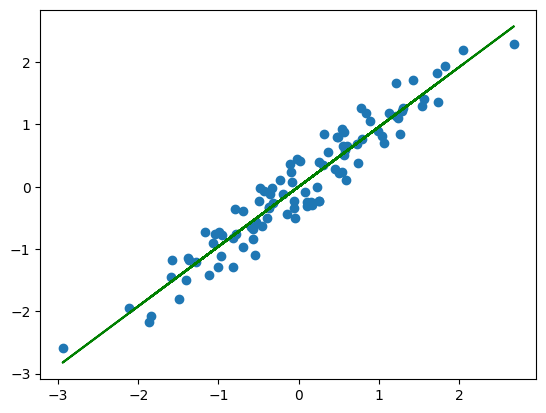

In [71]:
np.random.seed(2476)
a = np.random.randn(1)
b = np.random.randn(1)

lr = 0.01
n_steps = 1000

for step in range(n_steps):
    ys_pred = (xs_n*a)+b
    error = ys_n - ys_pred
    loss = (error**2).mean()
    objective = (ys-ys_pred)**2
    
    a_grad = -2 *( xs_n * error).mean()
    b_grad = -2 * error.mean()
    a = a - lr*a_grad
    b = b - lr*b_grad

plt.scatter(xs_n, ys_n)
plt.plot(xs_n, xs_n *a + b, 'g-')
print(a, b)

C:\Users\Agus\AppData\Local\Temp\ipykernel_11628\1938024788.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = torch.tensor(a - lr*a.grad, requires_grad=True)
C:\Users\Agus\AppData\Local\Temp\ipykernel_11628\1938024788.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(b - lr*b.grad, requires_grad=True)


tensor([0.9590], requires_grad=True) tensor([-9.9865e-10], requires_grad=True)


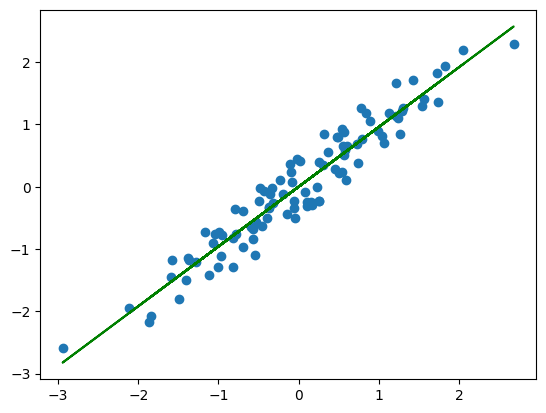

In [72]:
xs_t = torch.tensor(xs_n)
ys_t = torch.tensor(ys_n)

a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

lr = 0.01
n_steps = 1000

for step in range(n_steps):
    ys_pred = (xs_t*a)+b
    error = ys_t - ys_pred
    loss = (error**2).mean()
    loss.backward()
    
    a = torch.tensor(a - lr*a.grad, requires_grad=True)
    b = torch.tensor(b - lr*b.grad, requires_grad=True)

plt.scatter(xs_n, ys_n)
plt.plot(xs_n, xs_n *a.item() + b.item(), 'g-')
print(a, b)

In [73]:
import torch.optim as optim

tensor([0.9590], requires_grad=True) tensor([-8.6200e-10], requires_grad=True)


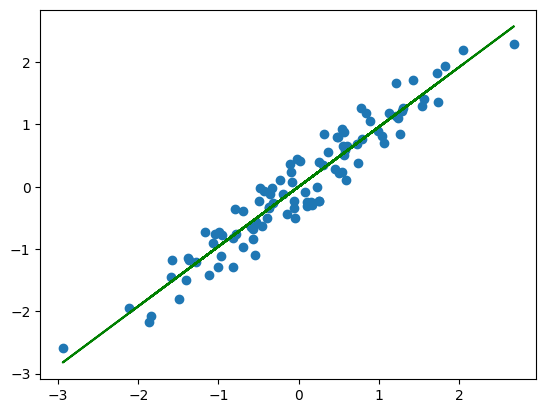

In [74]:
xs_t = torch.tensor(xs_n)
ys_t = torch.tensor(ys_n)

a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

optimizer =  optim.SGD([a, b], 0.01)

n_steps = 1000

for step in range(n_steps):
    ys_pred = (xs_t*a)+b
    error = ys_t - ys_pred
    loss = (error**2).mean()
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()


plt.scatter(xs_n, ys_n)
plt.plot(xs_n, xs_n *a.item() + b.item(), 'g-')
print(a, b)

In [76]:
import torch.nn as nn

tensor([0.9590], requires_grad=True) tensor([-8.6200e-10], requires_grad=True)


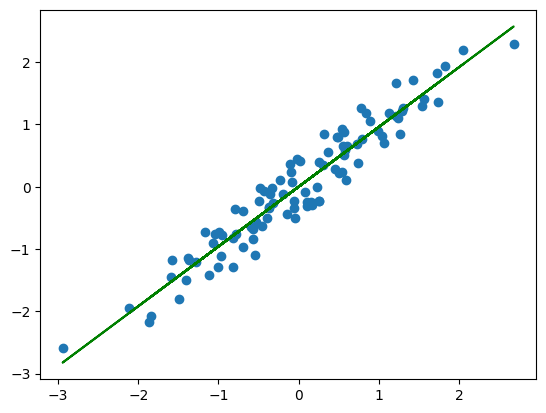

In [77]:
xs_t = torch.tensor(xs_n)
ys_t = torch.tensor(ys_n)


class MyLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        a = torch.randn(1, requires_grad=True)
        self.a = nn.Parameter(a)
        b = torch.randn(1, requires_grad=True)
        self.b = nn.Parameter(b)
    
    def forward(self,x):
        return self.a * x + self.b
    


my_model = MyLinearModel()
optimizer =  optim.SGD(my_model.parameters(), 0.01)

n_steps = 1000

for step in range(n_steps):
    ys_pred = my_model(xs_t)
    error = ys_t - ys_pred
    loss = (error**2).mean()
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()


plt.scatter(xs_n, ys_n)
plt.plot(xs_t.detach(), my_model(xs_t).detach(), 'g-')
print(a, b)

tensor([0.9590], requires_grad=True) tensor([-8.6200e-10], requires_grad=True)


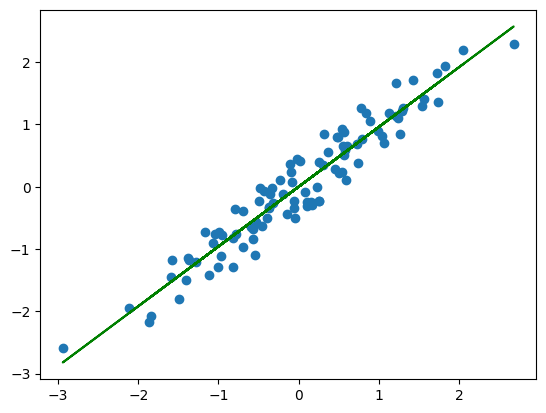

In [78]:
xs_t = torch.tensor(xs_n)
ys_t = torch.tensor(ys_n)


class MyLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        a = torch.randn(1, requires_grad=True)
        self.a = nn.Parameter(a)
        b = torch.randn(1, requires_grad=True)
        self.b = nn.Parameter(b)
    
    def forward(self,x):
        return self.a * x + self.b
    


my_model = MyLinearModel()
optimizer =  optim.SGD(my_model.parameters(), 0.01)
loss_fn = nn.MSELoss()

n_steps = 1000

for step in range(n_steps):
    ys_pred = my_model(xs_t)
    loss = loss_fn(ys_pred, ys_t)
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()


plt.scatter(xs_n, ys_n)
plt.plot(xs_t.detach(), my_model(xs_t).detach(), 'g-')
print(a, b)

In [214]:
import torch.utils.data as data_utils

tensor([0.9590], requires_grad=True) tensor([-8.6200e-10], requires_grad=True)


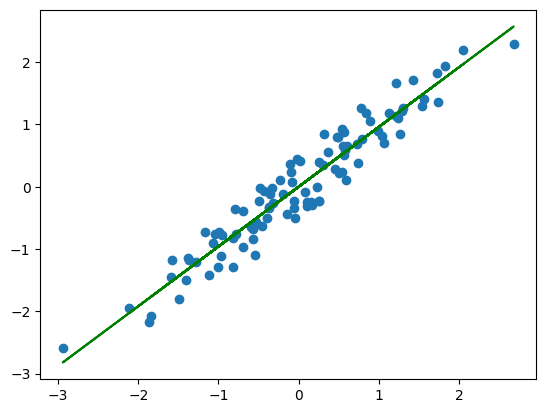

In [217]:
my_data_set =  data_utils.TensorDataset(xs_t, ys_t)

my_data_loader = data_utils.DataLoader(my_data_set, 100, True)


xs_t = torch.tensor(xs_n)
ys_t = torch.tensor(ys_n)


class MyLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        a = torch.randn(1, requires_grad=True)
        self.a = nn.Parameter(a)
        b = torch.randn(1, requires_grad=True)
        self.b = nn.Parameter(b)
    
    def forward(self,x):
        return self.a * x + self.b
    


my_model = MyLinearModel()
optimizer =  optim.SGD(my_model.parameters(), 0.01)
loss_fn = nn.MSELoss()

n_steps = 1000

for step in range(n_steps):
    for batch_x,batch_y in my_data_loader:
        ys_pred = my_model(batch_x)
        loss = loss_fn(ys_pred, batch_y)
        loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()


plt.scatter(xs_n, ys_n)
plt.plot(xs_t, my_model(xs_t).detach(), 'g-')
print(a, b)